### <p style="text-align: right;"> &#9989; Andrew Koren.</p>

# PHY480 Day 19

## In-class assignment: Metropolis algorithm

In this in-class assignment we experiment with the Metropolis algorithm.


In [155]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


**Task 1.** Consider the following probability density function (PDF):

$$
P(x)\sim (1-x^2)^{3/2},\,\,\,\,\,x\in[-1,1].
$$

Find the proper normalization so that the integral of the PDF is 1. Compute the mean and the variance. This will help the comparisons later.


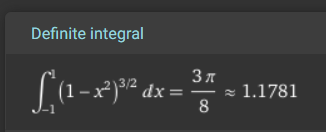

Mean $\mu = \int_a^b x f(x) dx$ <br>
Variance $\int_a^b x^2 f(x) dx - \mu^2$

This gives us $P(x) = \frac{8}{3\pi} \left(1-x^2\right)^{3/2} $. The mean is zero since it is symmetric times asymmetric function.

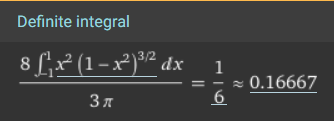

**Task 2.** Code the Metropolis algorithm where the proposed moves are drawn from the uniform distribution, $x\in[-1,1]$.


Notes: 

initialize x = x0 <br>
accpt = 0 <br>
for i = 1->N draw x' from Q(x) <br>
Q(x) = 1 &  x' = 2r-1 (arbitrary, q can be different)<br>

Compute $T_A = \min\left\{ 1, \frac{P(x')}{Q(x')}/\frac{P(x)}{Q(x)} \right\}$

Probability of staying vs going.



In [156]:
# sample (1-x^2)^{3/2} distribution, the proposal distribution is uniform
# Input:
# x -- current value
# Output:
# x, n -- x is the new value (may be the same if the move was rejected),
#         n = 1, if the new move was accepted, and = 0, if the move was rejected

target_pdf = lambda x: 8/(3*np.pi)*(1-x**2)**(3/2)

def get_rand_x32_flat( x, target_pdf=target_pdf ):
    '''
    Rquires target_pdf to be included above
    '''
    pdf_x = target_pdf(x)
    
    # proposal
    xp = np.random.uniform(-1, 1)
    pdf_xp = target_pdf(xp)
    
    # acceptance probability
    A = np.min((1, pdf_xp/pdf_x)) #min not really necessary

    return (xp, 1) if A > np.random.rand() else (x, 0)

**Task 3.** Generate a number of samples from the PDF you coded above, make a histogram and compare with the (normalized) PDF. Also, compute and print the acceptance rate.

In [157]:
# random seed for reproducibility
np.random.seed(3)


0.749718

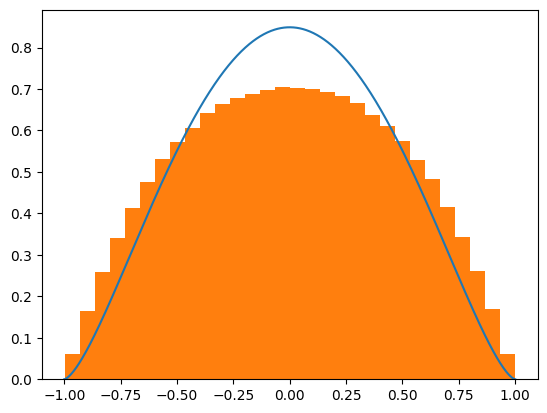

In [158]:
# YOUR CODE HERE
x = np.linspace(-1, 1, 1000)
y = target_pdf(x)

plt.plot(x,y)


samples = 1000000
metropolis_samples = np.array([get_rand_x32_flat(x_rand) for x_rand in np.random.uniform(-1, 1, samples)])
plt.hist(metropolis_samples[:,0], bins=30, density=True)
metropolis_samples[:, 1].mean() # acceptance rate

**Task 4.** Compute the mean and the variance from the data and compare with the exact results.


In [159]:
# YOUR CODE HERE
print(0, metropolis_samples[:,0].mean(), metropolis_samples[:,0].mean())
print(1/6, metropolis_samples[:,0].std(), abs(1/6-metropolis_samples[:,0].std()))

0 0.0005233110759739623 0.0005233110759739623
0.16666666666666666 0.4612510841258061 0.29458441745913944


**Task 5.** Compute the autocorrelation function:

$$
C(t)=\frac{1}{N-t_{max}}\sum_{i=1}^{N-t_{max}}(x_i-\bar x)(x_{i+t}-\bar x),
$$

where $\bar x$ is the mean. Use $t_{max}=10$. Plot the normalized autocorrelation function

$$
c(t)=\frac{C(t)}{C(0)}.
$$

For comparison, generate a series of random numbers uniformly distributed in $[0,1)$, compute and plot their autocorrelation function.


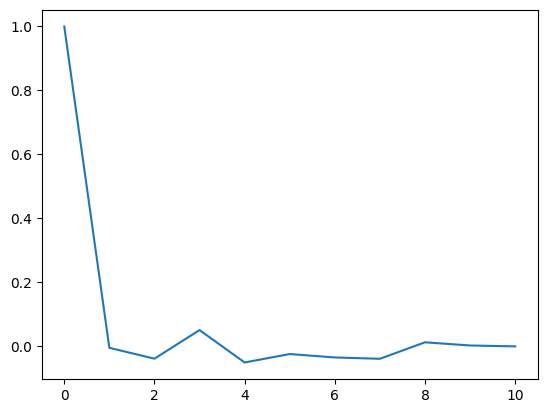

In [160]:
def autocorrelation(t, x, t_max=10):
    mu = np.mean(x)
    N = len(x)
    return 1/(N-t_max) * sum([(x[i]-mu)*(x[i+t]-mu) for i in range(N-t_max)])

x = np.random.uniform(0, 1, 1000)
t = np.arange(11)
C0 = autocorrelation(0, x)
Ct = autocorrelation(t, x)
ct = Ct/C0
plt.plot(t, ct);

**Task 6.** Modify the Metropolis algorithm so that the proposed moves are drawn from the PDF:

$$
Q(x)\sim \cos\left(\frac{\pi x}{2}\right).
$$

(Plot $P(x)$ and $Q(x)$ to understand why this proposal distribution may be more beneficial than the uniform one.)



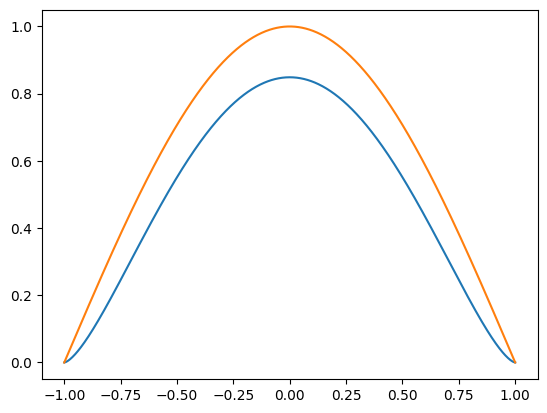

In [161]:
x = np.linspace(-1, 1, 1000)
y1 = target_pdf(x)
y2 = np.cos(np.pi*x/2)

plt.plot(x,y1)
plt.plot(x,y2)

In [162]:
import sympy as sp
from sympy.abc import x, t, u

f = sp.cos(sp.pi*t/2)
f *= 1/sp.integrate(f, (t, -1, 1))
cdf = sp.integrate(f, (t, -1, x))
Q = sp.solve(sp.Eq(u, cdf), x)[0]

Q_inv_cdf = sp.lambdify(u, Q)

In [163]:
# sample (1-x^2)^{3/2} distribution, the proposal distribution is cos(pi*x/2)
# Input:
# x -- current value
# Output:
# x, n -- x is the new value (may be the same if the move was rejected),
#         n = 1, if the new move was accepted, and = 0, if the move was rejected
def get_rand_x32_Q( x, P=target_pdf, Q=Q_inv_cdf ):
    '''
    Rquires target_pdf to be included above
    '''

    pdf_x = target_pdf(x)
    
    # Proposal
    u = np.random.rand()
    xp = Q_inv_cdf(u)
    pdf_xp = target_pdf(xp)
    
    # acceptance probability
    A = np.min((1, pdf_xp/pdf_x)) #min not really necessary

    return (xp, 1) if A > np.random.rand() else (x, 0)

**Task 7.** Repeat the previous tasks for the modified Metropolis algorithm: generate a sequence, plot a histogram, compute the mean and the variance, compute and plot the autocorrelation function. Compare the acceptance rate from the modified to the original version of the Metropolis algorithm with the uniform proposal distribution.


0.8817

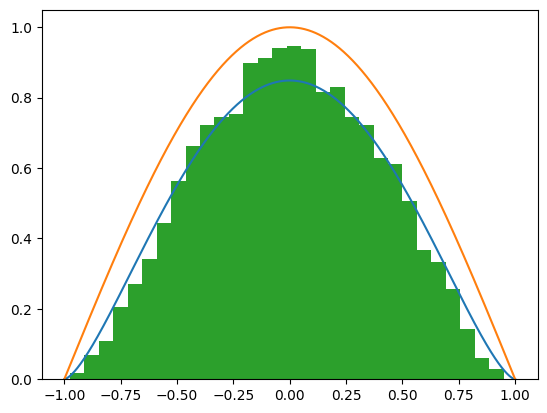

In [235]:
x = np.linspace(-1, 1, 1000)
y1 = target_pdf(x)
y2 = np.cos(np.pi*x/2)

plt.plot(x,y1)
plt.plot(x,y2)


samples = 10000
metropolis_samples = np.array([get_rand_x32_Q(x_rand) for x_rand in np.random.uniform(-1, 1, samples)])
plt.hist(metropolis_samples[:,0], bins=30, density=True)
metropolis_samples[:, 1].mean() # acceptance rate

In [175]:
print(0, metropolis_samples[:,0].mean(), metropolis_samples[:,0].mean())
print(1/6, metropolis_samples[:,0].std(), abs(1/6-metropolis_samples[:,0].std()))

0 -0.0011808363296585194 -0.0011808363296585194
0.16666666666666666 0.3870978667295375 0.22043120006287084


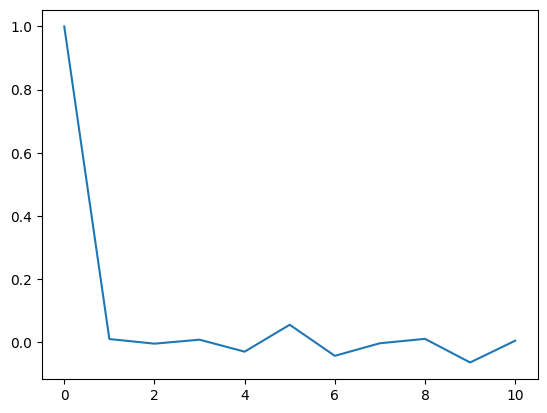

In [176]:
x = Q_inv_cdf(np.random.rand(1000))
t = np.arange(11)
C0 = autocorrelation(0, x)
Ct = autocorrelation(t, x)
plt.plot(t, Ct/C0);

---

What if we metropolis'd our metropolis?

0.8138

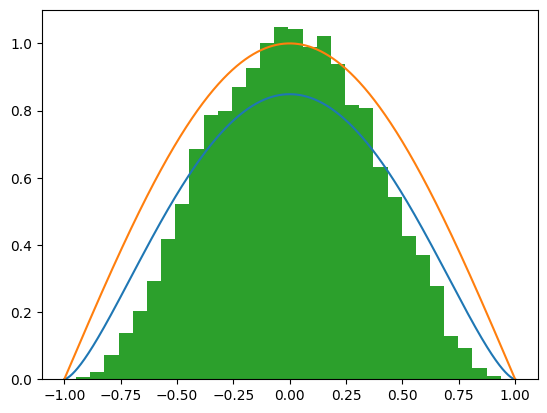

In [278]:
x = np.linspace(-1, 1, 1000)
y1 = target_pdf(x)
y2 = np.cos(np.pi*x/2)

plt.plot(x,y1)
plt.plot(x,y2)


metropolis_samples = np.array([get_rand_x32_Q(x) for x in metropolis_samples[:,0]])
plt.hist(metropolis_samples[:,0], bins=30, density=True)
metropolis_samples[:, 1].mean() # acceptance rate

Doesn't really change compared to 1 iteration, probably because we don't have $q(x|x')$ etc

&#169; Copyright 2025,  Michigan State University Board of Trustees